In [1]:
# TODO: explain how to run this, and that they only need the gist (loads tools)

# wranglign ---------
import pandas as pd
from siuba import *

# plotting ----------
from plotnine import *

theme_set(theme_classic(base_family = "Noto Sans CJK JP"))

# data --------------
from music_top200 import music_top200, track_features

# student support ----------
from siuba import pipe
from IPython.display import HTML, display
from siututor import Blank
___ = Blank()

# DataFrame display --------
pd.set_option("display.max_rows", 6)

from IPython import get_ipython
# special ipython function to get the html formatter
html_formatter = get_ipython().display_formatter.formatters['text/html']

# here, we avoid the default df._repr_html_ method, since it inlines css
# (style tags make vue angry)
html_formatter.for_type(
    pd.DataFrame,
    lambda df: df.to_html(max_rows = pd.get_option("display.max_rows"), show_dimensions = True)
)

# remove the <ggplot: (528...)> printout
html_formatter.for_type(ggplot, lambda g: "")


### Exercise 1: 

In this exercise, there are two code cells. The first defines variables for tracks by different artists. The second creates a plot.

Read through the code and plot, and then modify it to answer the question beneath.

In [2]:
roddy = (
  track_features
  >> filter(_.artist == "Roddy Ricch")
)

billie = (
  track_features
  >> filter(_.artist == "Billie Eilish")
)

other = (
  track_features
  >> filter(_.artist == "ITZY")
)

other

,artist,album,track_name,energy,valence,danceability,speechiness,acousticness,popularity,duration
1431,ITZY,IT'z Different,달라달라 (DALLA DALLA),0.853,0.713,0.790,0.0665,0.00116,73,199.874
21148,ITZY,IT'z Different,달라달라 DALLA DALLA,0.853,0.713,0.790,0.0665,0.00116,57,199.874
22388,ITZY,It'z Me,WANNABE,0.911,0.640,0.809,0.0617,0.00795,81,191.242
25287,ITZY,IT'z ICY,ICY,0.904,0.814,0.801,0.0834,0.03240,72,191.142


The code below plots hits for the `roddy` variable.
Note that you could swap out `roddy` for any of the other two variables above.

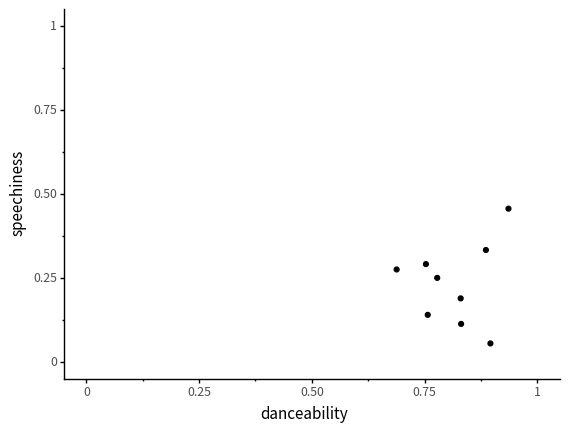

<ggplot: (280747300)>

In [3]:
(roddy
  >> ggplot(aes("danceability", "speechiness"))
   + geom_point()
   + expand_limits(x = [0, 1], y = [0, 1])
)



<prompt-expandable header="Who has the widest range of danceability? (i.e. biggist difference between highest and lowest)">

<q-multiple-choice>
  <q-opt text="Roddy Ricch"><span>Try again.</span></q-opt>
  <q-opt text="Billie Eilish"><span>That's right!</span></q-opt>
  <q-opt text="ITZY"><span>Try again. All the ITZY songs shown have roughly the same danceability.</span></q-opt>
</q-multiple-choice>

</prompt-expandable>



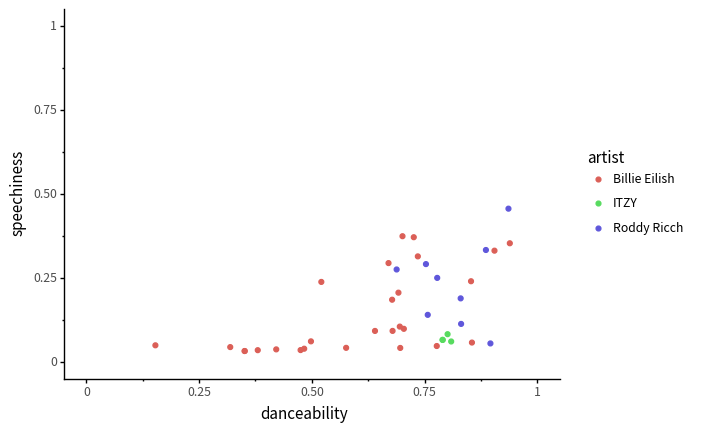

<ggplot: (302871360)>

In [4]:
import pandas as pd
all_together = pd.concat([roddy, billie, other])

(all_together
  >> ggplot(aes("danceability", "speechiness", color = "artist"))
   + geom_point()
   + expand_limits(x = [0, 1], y = [0, 1])
)

### Exercise 2:

Does it look like there any extremely popular songs over 15 minutes long?

There is not one concrete answer to this question.
Make a plot below, and come up with an answer you might share with another person.

<details><summary>hint</summary>

> The duration column contains the length of each song in seconds. Use this with the popularity column.

</details>

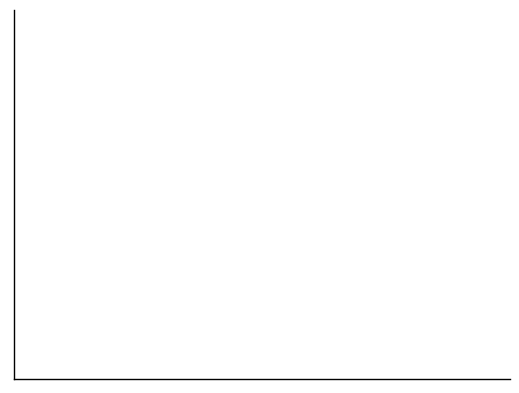

<ggplot: (-9223372036573430517)>

In [5]:
(track_features
  >> ggplot()

)

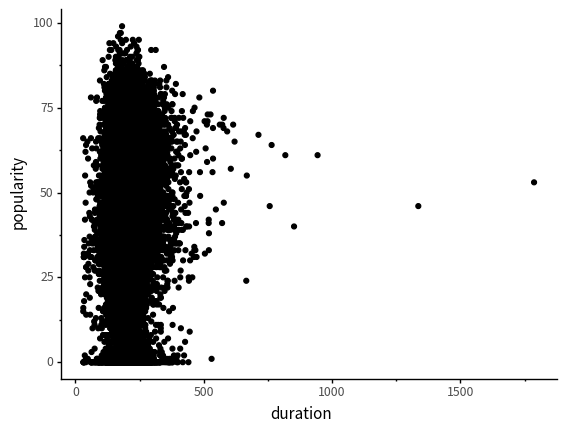

<ggplot: (302719194)>

In [6]:
(track_features
  >> ggplot(aes("duration", "popularity"))
   + geom_point()
)

<details>
<summary>possible answers</summary>
    
<a target="_blank" href="https://v.usetapes.com/XhWxJ9lAox">screencast</a>
    
    
</details>

### Exercise 3:

Does the lowest energy track belong to a "low energy" artist? In this exercise, we'll explore the questions using tracks by two artists.

Here is the track data sorted by energy.

In [7]:
# this code is to help you examine track energy levels 
(
  track_features
  >> arrange(_.energy)
)

,artist,album,track_name,energy,valence,danceability,speechiness,acousticness,popularity,duration
1003,Simon Smith,Loops,Blagaslavlaju vas,0.000778,0.000,0.779,0.4210,0.99400,0,36.038
5995,DMS,Prepáčte,Nič,0.000791,0.000,0.571,0.4460,0.95000,25,37.355
16689,Peter Simon,Snowrain,Snowrain,0.003480,0.373,0.472,0.0517,0.99600,0,31.000
...,...,...,...,...,...,...,...,...,...,...
22695,Nino Xypolitas,Epireastika,Eime Enas Allos - Original,0.996000,0.517,0.644,0.1030,0.00346,34,214.693
17072,Otira,Soundboy Burnin’,Soundboy Burnin’,0.997000,0.327,0.568,0.2330,0.00299,14,173.846
11069,Scooter,No Time To Chill,How Much Is the Fish?,0.999000,0.615,0.533,0.0786,0.00130,48,226.200


 Notice that Simon Smith has the lowest energy song ("Blagaslavlaju vas"), while Scooter has the highest energy song ("How Much is the Fish?").

First, filter the track_features data to create a variable named `artist_low` that has only tracks by the artist Simon Smith.

In [8]:
# create artist_low variable here

artist_low = (
    
)

Next, create a variable named `artist_high` with tracks by the artist Scooter, who has the highest energy song.

In [9]:
# create artist_high variable here

 

Based on separate plots of their data, does the artist with the lowest energy track seem to have lower energy songs in general?

In [10]:
# examine plots of each artist, to answer question
# note, we're examining energy, so to make a scatterplot you could set
# the second variable to anything interesting (e.g. popularity)

(___

)

⚠️: <b>Don't forget to replace all the blanks!</b>

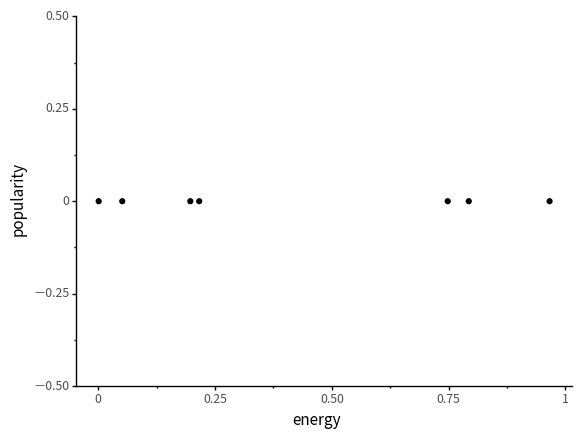

<ggplot: (-9223372036550684044)>

In [11]:
artist_low = track_features >> filter(_.artist == "Simon Smith")

artist_high = track_features >> filter(_.artist == "Scooter")

ggplot(artist_low, aes("energy", "popularity")) + geom_point()

#ggplot(artist_high, aes("energy", "popularity")) + geom_point()

<details><summary>possible answer</summary>

The high energy artist, Scooter, seems to only have high energy songs (from about .9 to 1 energy).
    
On the other hand, the low energy artist, Simon Smith, seems to have a wide range of energy values (from about 0 to 1 energy).
</details>